In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df1 = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df1.shape

(10000, 14)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df1.duplicated().sum()

0

In [9]:
# how many current user bank have 
# (df1['Exited'] == 1).sum()
df1['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
# remove unnecessary columns
df1.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [11]:
df1.head()
df1.shape

(10000, 11)

In [12]:
# encode the geography and gender columns
df1 = pd.get_dummies(df1, columns = ['Geography', 'Gender'], drop_first = True)

In [13]:
df1['Geography_Germany'] = df1['Geography_Germany'].fillna(0).astype(int)
df1['Geography_Spain'] = df1['Geography_Spain'].fillna(0).astype(int)
df1['Gender_Male'] = df1['Gender_Male'].fillna(0).astype(int)

In [14]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
x = df1.drop(columns =['Exited'])
y = df1.iloc[:, 8:9]
x.shape
y.shape

(10000, 1)

In [16]:
x
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [17]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 12)

In [18]:
print(x_train.shape , x_test.shape)
print(y_train.shape, y_test.shape)


(8000, 11) (2000, 11)
(8000, 1) (2000, 1)


In [19]:
# apply standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
x_train_scaled
x_test_scaled

array([[-0.025186  , -0.56263868,  0.68138259, ...,  1.73032049,
        -0.57003687,  0.91025899],
       [ 0.41778058, -0.18193884,  1.37415258, ..., -0.57792762,
        -0.57003687,  0.91025899],
       [ 2.05572678,  0.29393597,  1.02776758, ..., -0.57792762,
        -0.57003687, -1.09858844],
       ...,
       [ 0.57230381, -0.18193884,  0.68138259, ..., -0.57792762,
         1.75427249, -1.09858844],
       [-0.33423245,  0.10358605, -1.74331239, ...,  1.73032049,
        -0.57003687, -1.09858844],
       [-1.38499039, -0.56263868,  1.72053757, ...,  1.73032049,
        -0.57003687, -1.09858844]])

In [58]:
# import dl library
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model1 = Sequential()

model1.add(Dense(3, activation = 'sigmoid', input_dim = 11))
model1.add(Dense(1, activation = 'sigmoid'))

In [60]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
model1.compile(loss = 'binary_crossentropy' , optimizer = 'Adam')

In [62]:
model1.fit(x_train_scaled , y_train, epochs = 10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5254
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4823
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4671
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4499
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4478
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4314
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4226
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4253
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4121
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4168


In [63]:
model1.layers[0].get_weights()

[array([[ 0.05556237,  0.07165094,  0.12840472],
        [-1.0960219 , -1.3715966 , -1.3710715 ],
        [ 0.26909438,  0.32672167, -0.25050446],
        [-0.3472975 ,  0.04838545, -0.4414366 ],
        [-0.12964211,  0.33208433,  0.06426964],
        [ 0.08829765,  0.21418278, -0.12278005],
        [ 0.5676772 ,  0.5983266 ,  0.4961612 ],
        [-0.14675438,  0.02910869, -0.01816043],
        [-1.0417511 , -0.42105895, -0.36699286],
        [-0.47615546,  0.04030121,  0.2485907 ],
        [ 0.6025174 ,  0.15180647,  0.58703077]], dtype=float32),
 array([-0.15335654,  0.19988288,  0.04046797], dtype=float32)]

In [64]:
model1.layers[1].get_weights()

[array([[-0.39468077],
        [-1.1753526 ],
        [-1.7122432 ]], dtype=float32),
 array([0.06053188], dtype=float32)]

In [65]:
y_log = model1.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [66]:
y_pred = np.where(y_log >0.5 , 1, 0)

In [67]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.787

In [69]:
# how to improve efficiency 
# increase no. of epochs in model training , increase nodes in hidden layer , increase hidden layer , place relu activation function in 
# hidden layer only

In [70]:
model2 = Sequential()

model2.add(Dense(11, activation = 'relu', input_dim = 11))
model2.add(Dense(11, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 830 (3.25 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 554 (2.17 KB)

In [77]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'Adam' , metrics = ['accuracy'])

In [97]:
history = model2.fit(x_train_scaled , y_train, epochs = 100, validation_split= 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8780 - loss: 0.2988 - val_accuracy: 0.8438 - val_loss: 0.3536
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8736 - loss: 0.3137 - val_accuracy: 0.8469 - val_loss: 0.3554
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8706 - loss: 0.3093 - val_accuracy: 0.8462 - val_loss: 0.3555
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8796 - loss: 0.2970 - val_accuracy: 0.8475 - val_loss: 0.3549
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.3220 - val_accuracy: 0.8481 - val_loss: 0.3557
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.3209 - val_accuracy: 0.8450 - val_loss: 0.3558
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3205 - val_accuracy: 0.8456 - val_loss: 0.3557
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8748 - loss: 0.3146 - val_accu

In [98]:
history.history

{'accuracy': [0.8706250190734863,
  0.8715624809265137,
  0.8701562285423279,
  0.8698437213897705,
  0.8728125095367432,
  0.8720312714576721,
  0.8726562261581421,
  0.8731250166893005,
  0.8725000023841858,
  0.8737499713897705,
  0.8715624809265137,
  0.8706250190734863,
  0.8731250166893005,
  0.8723437786102295,
  0.8726562261581421,
  0.8715624809265137,
  0.8704687356948853,
  0.8712499737739563,
  0.8725000023841858,
  0.8717187643051147,
  0.874218761920929,
  0.8712499737739563,
  0.8712499737739563,
  0.8712499737739563,
  0.87109375,
  0.8706250190734863,
  0.8714062571525574,
  0.8720312714576721,
  0.8701562285423279,
  0.8717187643051147,
  0.8737499713897705,
  0.8739062547683716,
  0.871874988079071,
  0.8712499737739563,
  0.8737499713897705,
  0.87109375,
  0.8714062571525574,
  0.8721874952316284,
  0.8732812404632568,
  0.8721874952316284,
  0.8735937476158142,
  0.8712499737739563,
  0.8740624785423279,
  0.871874988079071,
  0.8739062547683716,
  0.8712499737739

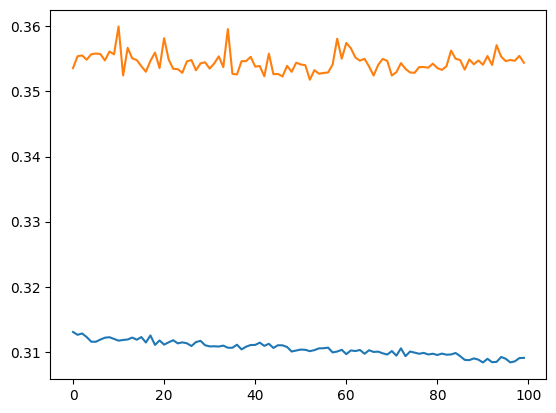

In [99]:
# plot loss vs val_loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

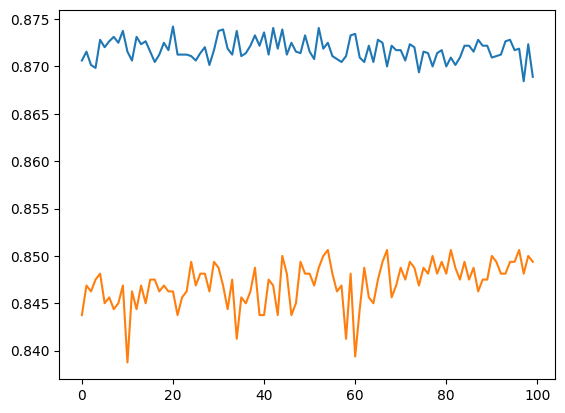

In [100]:
# plot accuracy vs val_accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [80]:
model2.layers[0].get_weights()

[array([[-3.73409316e-02,  2.06874385e-01,  3.85129172e-03,
          1.92970395e-01, -3.05349082e-01, -1.17246978e-01,
          1.32585377e-01,  2.29516417e-01, -3.63063812e-01,
          8.35616142e-02, -2.43025243e-01],
        [ 1.80563375e-01, -1.88949585e-01, -5.64494848e-01,
         -5.51372766e-01,  6.90390885e-01, -3.05204570e-01,
          5.08967876e-01, -1.08066976e-01, -3.74939442e-01,
         -8.43350828e-01,  5.52976489e-01],
        [-1.51881203e-01,  8.08351710e-02, -4.07618470e-02,
         -2.33344510e-01,  1.32640395e-02, -1.49156777e-02,
          8.88044685e-02,  1.07538037e-01, -2.27388591e-01,
         -1.58983674e-02,  1.61658287e-01],
        [ 2.48533431e-02,  6.68235004e-01,  1.50548205e-01,
         -2.02105612e-01, -1.44621477e-01, -7.17586458e-01,
         -3.10080629e-02, -8.20854962e-01,  6.83776677e-01,
         -1.51201263e-01, -3.26116800e-01],
        [-1.33416808e+00,  7.19985187e-01,  3.32841948e-02,
          2.64876366e-01,  9.56702173e-01, -

In [83]:
model2.layers[1].get_weights()

[array([[ 2.3790608e-01, -3.4403199e-01, -1.3531382e-01,  2.6222029e-01,
         -2.5807339e-01,  3.6764327e-02, -2.5359765e-01, -5.6373847e-01,
          5.9482533e-01,  7.4879950e-01,  8.1399992e-02],
        [-3.8470292e-01, -5.6598045e-02, -8.7016487e-01, -2.3488392e-01,
         -3.7313166e-01,  3.5414365e-01,  5.8412194e-02,  4.1396773e-01,
          1.5934965e-01,  5.7998079e-01,  1.8381748e-01],
        [ 2.5742365e-02, -3.9276809e-02,  3.9464477e-01, -6.5939403e-01,
         -1.2589154e-01,  3.9119273e-01,  4.9624205e-02,  3.7038922e-02,
         -4.7472507e-01, -5.8905303e-01, -1.9096965e-01],
        [ 2.1895044e-03,  3.2952890e-01,  3.5555196e-01, -3.5802016e-01,
         -6.3452524e-01,  4.3584445e-01,  2.3217890e-02,  3.1569815e-01,
          3.9823931e-01, -4.2455432e-01,  2.1575563e-01],
        [ 2.2358273e-01, -2.2143237e-02,  2.6869062e-01, -3.9543003e-01,
          3.5576996e-01, -3.2548556e-01, -6.4651638e-02,  7.5346631e-01,
          6.0124815e-01,  3.0332509e-0

In [84]:
model2.layers[2].get_weights()

[array([[-0.7348371 ],
        [-0.60825706],
        [-0.76203346],
        [ 0.68836534],
        [-0.96708506],
        [ 0.1395681 ],
        [-0.5351245 ],
        [ 1.2782917 ],
        [ 1.3016752 ],
        [ 0.8380877 ],
        [-1.2654743 ]], dtype=float32),
 array([-0.2648255], dtype=float32)]

In [85]:
y_log = model2.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [87]:
y_pred = np.where(y_log > 0.5 , 1, 0)

In [88]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8565